### 1. A birthday problem

As there are more people in a group, the probability of someone has a birthday today increases (at least one person has a birthday today.) I want to be able to plot a graph that describes the relationship between these two factors: number of people and the probability of today being someone's birthday

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)

#range of the number of people
x = [i for i in range(1,501)]

In [2]:
len(x)

500

The probability of someone not having today as their birthday is $\frac{364}{365}$ under the assumption there are only 365 days in a year.

Therefore, the probability of $n$ people not having today as their birthday is $(\frac{364}{365})^n$. Hence the probability of today being someone's birthday is $1 - (\frac{364}{365})^n$

In [3]:
#calculating this probability for the number of people
y = [(1-(364/365)**i) for i in x]

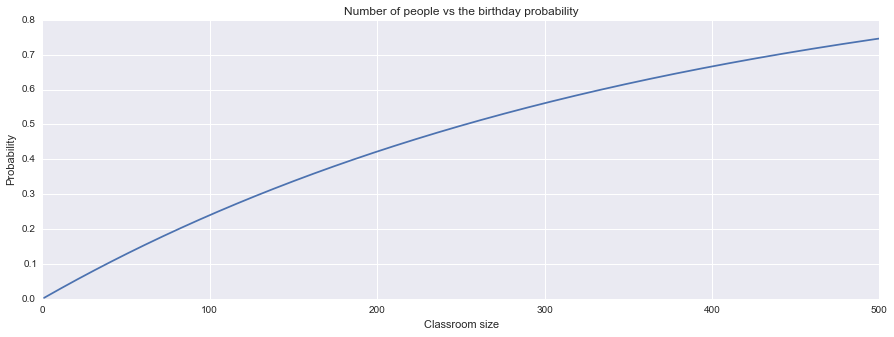

In [4]:
sns.plt.plot(x, y)
sns.plt.title('Number of people vs the birthday probability')
sns.plt.xlabel('Classroom size')
sns.plt.ylabel('Probability')
sns.plt.show()

### 2. Another much more exciting and _famous_ birthday problem

Now onto a much more famous problem in statistics. 

**_How big does a group have to be so that the chances of a birthday match within the group is at least 50%?_**

This is an interesting question. When you are with a group people, intuition tells you that it must be pretty rare for a person to have the same birthday with someone else, right? There are 365 days in a year after all.

When I posed this question to my mom, she followed the below thread of logic (which is totally sound by the way, so props mom!). When there are 366 people in a group, there DEFINITELY has to be two people having the same birthday so the chances here are 100%. Therefore, she guessed that $366/2 = 183$ people for the probability to be 50%. 

Wow, my mom is so smart! But hang on just a second... 

To solve this problem computationally, we can first try to generalize it.

Given $k$ people in a group, what's the probability of _at least_ two people having the same birthday?

The easier way to count is to determine the complement and then subtract it from $1$ (this is a good trick to count whenever you see _at least_ or _none_)

To count this more intuitively, say the first person can have any birthday. Then the second person has 364 days to choose from in order to not share the same birthday with the first person; the third person has 363 days, and so on. Therefore the number of situations where no one share the same birthday is $365\times 364 \times 363 \times ... \times (365-k + 1)$. 

Then, what are **_all_** the possibilities of birthdays for $k$ people? Quite simply, $356^k$ because each person can be born on any 365 days. 

Therefore the probababilility we're looking for is:

$$
1 - \frac{365\times 364 \times 363 \times ... \times (365-k + 1)}{356^k}\\
= 1 - \frac{365!}{(365-k)!365^k}
$$


Alright, now we have a general way of finding out this probability. Let's see what it looks like...




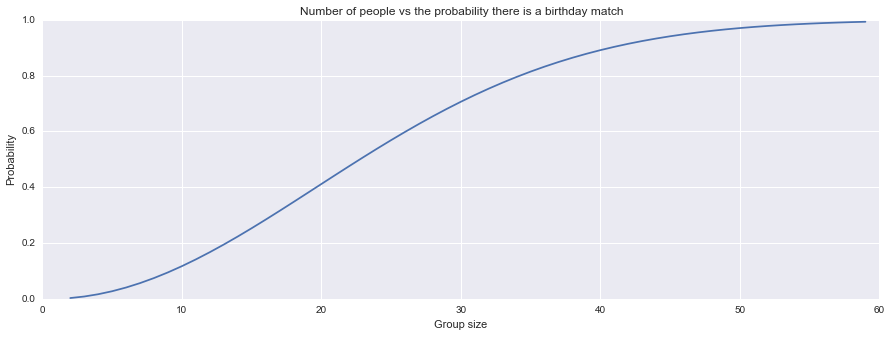

In [7]:
from math import factorial

def p_k(k):
    '''function to compute probability of a birthday match
    from a group of k people'''
    return 1-(factorial(365)/(factorial(365-k)*365**k))

k = [i for i in range(2,60)]
p = [p_k(i) for i in k]
sns.plt.plot(k, p)
sns.plt.title('Number of people vs the probability there is a birthday match')
sns.plt.xlabel('Group size')
sns.plt.ylabel('Probability')
sns.plt.ylim((0, 1))
sns.plt.show()

As the graph shows, when there are 23 people in the group, the chances of having a birthday match is slightly more than half. There is almost 100% guarantee that at least two people will have the same birthday when the group is bigger than 50. What an unexpected result! 

You only need 23 people for a 50% chance of there being a birthday match.

To understand this intuitively, think about how there are ${{23}\choose{2}} = 253$ possible pairs selected from 23 people. Each pair has $\frac{1}{365}$ chance of having a birthday match so you actually do not need as many as 183 people!

_Citation_: I consulted **_A first course in Probability_, 9th edition by Sheldon Ross** while writing up this problem. 

### 3. Bringing it all together

We've visited two birthday problems. 

In the first one, we see that to achieve a 50% chance of today being someone's birthday, we need ~**250 people**. On the other hand, only **23 people** are enough for a 50% chance of two people sharing the same birthday, less than 10% of the former's group size. 

To me, these results highlight very interesting difference between expectations and reality. :)

Hopefully I was able to inject some tuition into the math behind it.